# Exercise 7
Using the UCI Mushroom dataset, use k-means and a suitable cluster evaluation metric to determine the optimal number of clusters in the dataset. Note that this may not necessarily be two (edible versus not-edible).
Plot this metric while increasing the number of clusters, e.g.,
 (see here for an example).
Visualise the data using the number of clusters and a suitable projection or low-dimensional embedding.

In [79]:
import pandas as pd

data = pd.read_csv('agaricus-lepiota.csv')
data_encoded = pd.get_dummies(data)

In [80]:
from sklearn.cluster import KMeans

inertia = []
range_clusters = range(2, 30)

for n_clusters in range_clusters:
    kmeans = KMeans(n_clusters=n_clusters, n_init=10,  random_state=42)
    kmeans.fit(data_encoded)
    inertia.append(kmeans.inertia_)


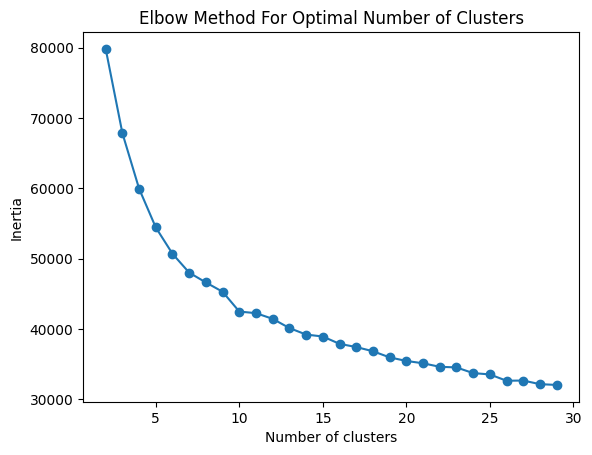

In [81]:
import matplotlib.pyplot as plt

plt.plot(range_clusters, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.show()


In [82]:
from sklearn.decomposition import PCA

def optimal_number_of_clusters(inertia):
    x1, y1 = 1, inertia[0]
    x2, y2 = len(inertia), inertia[-1]

    distances = []
    for i, y in enumerate(inertia):
        x0 = i + 1
        numerator = abs((y2-y1)*x0 - (x2-x1)*y + x2*y1 - y2*x1)
        denominator = ((y2-y1)**2 + (x2-x1)**2)**0.5
        distances.append(numerator/denominator)

    return distances.index(max(distances)) + 1

optimal_clusters = optimal_number_of_clusters(inertia)
print('Optimal number of clusters: ', optimal_clusters)

kmeans = KMeans(n_clusters=optimal_clusters, n_init=10, random_state=42)
clusters = kmeans.fit_predict(data_encoded)

pca = PCA(n_components=3)
data_pca_3d = pca.fit_transform(data_encoded)

Optimal number of clusters:  9


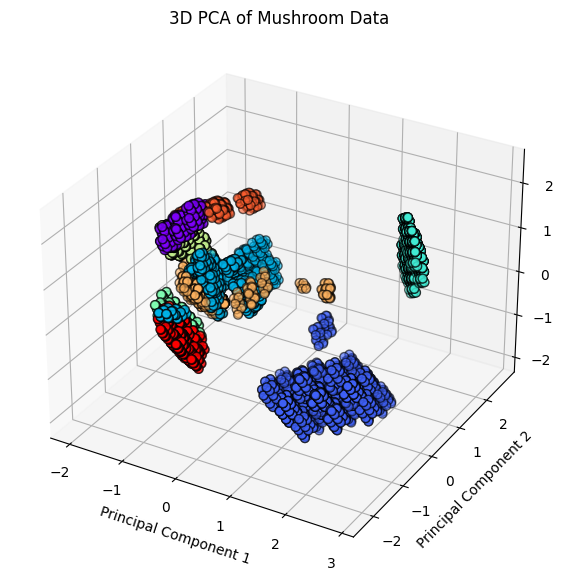

In [83]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming you've already used KMeans clustering and have a 'clusters' list
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(data_pca_3d[:, 0], data_pca_3d[:, 1], data_pca_3d[:, 2],
                     c=clusters, cmap='rainbow', edgecolor='k', s=40, alpha=0.6)

ax.set_title("3D PCA of Mushroom Data")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")

plt.show()
